In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # Added import

In [4]:
data = pd.read_csv('/content/Melbourne_housing_FULL.csv')
print(data.head())

data = data.dropna(subset=['Price']) #handling missing values
data = data.dropna(subset=['Postcode']) #handling missing values

data['LogPrice'] = np.log(data['Price']) #using a log transformation since data might be skewed

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             R

#Different **Branch**

In [5]:
summary_stats = data.groupby('Postcode')['Price'].describe() #Summary Statistics
print(summary_stats)

          count          mean           std       min       25%        50%  \
Postcode                                                                     
3000.0    151.0  7.615993e+05  6.083431e+05  210000.0  450000.0   637500.0   
3002.0     36.0  1.374431e+06  1.165225e+06  121000.0  682500.0   897500.0   
3003.0     51.0  1.076775e+06  5.381532e+05  295000.0  660000.0  1010000.0   
3006.0     59.0  6.564746e+05  3.200638e+05  370000.0  526750.0   595000.0   
3008.0      7.0  8.000000e+05  3.791328e+05  360000.0  527500.0   795000.0   
...         ...           ...           ...       ...       ...        ...   
3910.0     15.0  5.925000e+05  1.705827e+05  337000.0  491000.0   565500.0   
3975.0      2.0  6.137500e+05  2.298097e+04  597500.0  605625.0   613750.0   
3976.0      5.0  5.776000e+05  1.078439e+05  400000.0  561000.0   622000.0   
3977.0     27.0  6.121095e+05  1.219529e+05  440000.0  520500.0   572000.0   
3978.0      3.0  6.330000e+05  5.702631e+04  575000.0  605000.0 

In [6]:
# Display the average price
# Get the average price per postcode
average_price_per_postcode = data.groupby('Postcode')['Price'].mean()

# Displaying the average price along with the postcode in a tabular format
print(average_price_per_postcode)


Postcode
3000.0    7.615993e+05
3002.0    1.374431e+06
3003.0    1.076775e+06
3006.0    6.564746e+05
3008.0    8.000000e+05
              ...     
3910.0    5.925000e+05
3975.0    6.137500e+05
3976.0    5.776000e+05
3977.0    6.121095e+05
3978.0    6.330000e+05
Name: Price, Length: 209, dtype: float64


In [7]:
import pandas as pd

# Set the float format to display floating-point numbers without scientific notation
pd.options.display.float_format = '{:.1f}'.format

# Assuming 'data' is your DataFrame
# Get the average price per postcode
average_price_per_postcode = data.groupby('Postcode')['Price'].mean()

# Print out the average price of all the postcodes
print("Average Price per Postcode:")
print(average_price_per_postcode)

# Ask the user for their ideal price
ideal_price = float(input("Enter your ideal price: $"))

# Find the postcode with the price closest to the user's ideal price
closest_postcode = (average_price_per_postcode - ideal_price).abs().idxmin()
closest_price = average_price_per_postcode.loc[closest_postcode]

# Print out the postcode with the closest price to the user's ideal price
print(f"The postcode with the price closest to your ideal price is {closest_postcode} with an average price of ${closest_price:.1f}")

# Filter the original data for the closest postcode and print out all the prices
prices_for_closest_postcode = data[data['Postcode'] == closest_postcode]['Price']
print(f"All prices for postcode {closest_postcode}:")
print(prices_for_closest_postcode)


Average Price per Postcode:
Postcode
3000.0    761599.3
3002.0   1374430.6
3003.0   1076774.5
3006.0    656474.6
3008.0    800000.0
            ...   
3910.0    592500.0
3975.0    613750.0
3976.0    577600.0
3977.0    612109.5
3978.0    633000.0
Name: Price, Length: 209, dtype: float64
Enter your ideal price: $599000
The postcode with the price closest to your ideal price is 3754.0 with an average price of $600168.6
All prices for postcode 3754.0:
14345   530500.0
14493   670000.0
14495   520500.0
15125   487500.0
15127   700000.0
          ...   
34489   745000.0
34490   570000.0
34491   600000.0
34492   615000.0
34493   551000.0
Name: Price, Length: 119, dtype: float64


Mean Squared Error (MSE): 334934478677.72186
R-squared (R2) Score: -0.1308405171862994


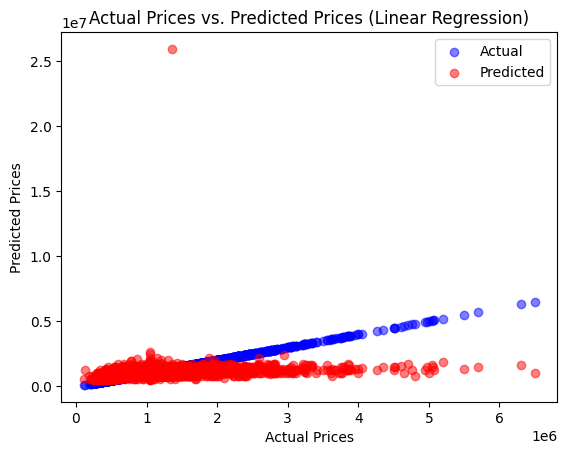

In [8]:
#LINEAR REGRESSION

# Step 1: Load and preprocess the dataset
data = pd.read_csv('/content/Melbourne_housing_FULL.csv')

# Assuming you have selected relevant features (independent variables) to predict the 'Price'.
# For simplicity, let's use 'Rooms' and 'Distance' as features.
X = data[['Rooms', 'BuildingArea']]
y = data['Price']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Handle Missing Values
# Create an imputer and fit-transform X_train
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 4: Create and train the Linear Regression model
# If 'y' contains NaN values, you need to impute them as well
y_imputer = SimpleImputer(strategy='mean')
y_train = y_imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test = y_imputer.transform(y_test.values.reshape(-1, 1))

# Flatten the y arrays back to 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()



# Step 5: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

# Visualization (Optional)
plt.scatter(y_test, y_test, label="Actual", color='blue', alpha=0.5)  # Actual values in blue
plt.scatter(y_test, y_pred, label="Predicted", color='red', alpha=0.5)  # Predicted values in red

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices (Linear Regression)")
plt.legend()
plt.show()



